<a href="https://colab.research.google.com/github/tevrat-aksoy/Image-Filter-Algorithms/blob/main/Image_Filters_and_Effects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np

Drive üzerinden dosya okuma yapılır.

In [ ]:
orgImage= img.imread("/content/drive/MyDrive/colab_data/pexels-photo-1108099.jpeg");

Görüntünün yükseklik ve genişlik özellikleri bulunur.

In [ ]:
width, height ,c = orgImage.shape
print("image width=",width,"height="  ,height ,"channel=",c )

image width= 375 height= 500 channel= 3


**Siyah Beyaz Filtresi** 

Görüntünün siyah-beyaz yapılması için RGB değerlerinin ortalaması alınarak yeni görüntüye atanır.  





In [ ]:
def GreyScale(imageIn):

  imageOut = np.zeros([width, height, 3])

  for i in range(width):
    for j in range(height):
        avg = (imageIn[i][j][0]+ imageIn[i][j][1]+imageIn[i][j][2] )/3
        imageOut[i][j][0] = avg
        imageOut[i][j][1] = avg
        imageOut[i][j][2] = avg

  return imageOut

In [ ]:
scaledImage=orgImage/255
greyImage = np.zeros([width, height, 3])
greyImage=GreyScale(scaledImage)
img.imsave('grayedImage.png', greyImage)

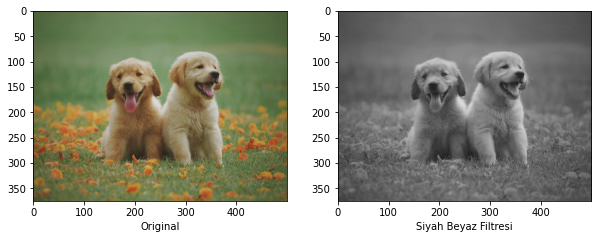

In [ ]:
f1=plt.figure()
f1.set_figheight(10)
f1.set_figwidth(10)
label11=f1.add_subplot(1,2,1)
label11.set_xlabel('Original')
plt.imshow(scaledImage)
label12=f1.add_subplot(1,2,2)
label12.set_xlabel('Siyah Beyaz Filtresi')
plt.imshow(greyImage)

**Negatif Filtresi**

Görüntünün negatif yapılması için RGB değerleri maksimum değerinden çıkarılarak yeni görüntüye atanır.

In [ ]:
def NegativeImage(imageIn):

  imageOut = np.zeros([width, height, 3])
  for i in range(width):
    for j in range(height):
      imageOut[i][j][0] = 1-imageIn[i][j][0]
      imageOut[i][j][1] = 1-imageIn[i][j][1]
      imageOut[i][j][2] = 1-imageIn[i][j][2]

  return imageOut

In [ ]:
negativeImage = np.zeros([width, height, 3])
negativeImage=NegativeImage(scaledImage)
img.imsave('negativeImage.png', negativeImage)

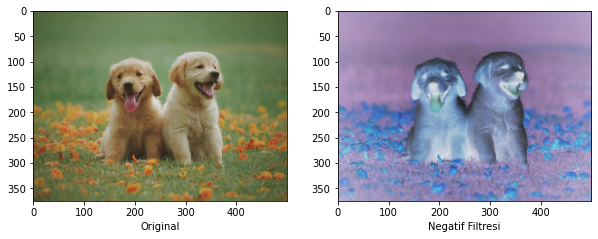

In [ ]:
f2=plt.figure()
f2.set_figheight(10)
f2.set_figwidth(10)
label21=f2.add_subplot(1,2,1)
label21.set_xlabel('Original')
plt.imshow(scaledImage)
label22=f2.add_subplot(1,2,2)
label22.set_xlabel('Negatif Filtresi')
plt.imshow(negativeImage)

**A) SANATSAL FİLTRELER**

---



**1) Sıcak Hava Filtresi**

Görüntü üzerinde sıcak hava filtresi uygulamak için görüntünün R değerleri arttırılır. B değerleri ise azaltılır. G değerleri üzerinde işlem yapılmaz.

In [ ]:
def WarmImage(imageIn):
  imageOut = np.zeros([width, height, 3])

  for i in range(width):
    for j in range(height):
      imageOut[i][j][0]= imageIn[i][j][0]+50
      if imageOut[i][j][0]>255: imageOut[i][j][0]=255

      imageOut[i][j][1]= imageIn[i][j][1]

      imageOut[i][j][2]= imageIn[i][j][2]-50
      if imageOut[i][j][2]<0: imageOut[i][j][2]=0  

  imageOut=imageOut/255
  return imageOut

In [ ]:
warmImage = np.zeros([width, height, 3])
warmImage=WarmImage(orgImage)
img.imsave("warmImage.png",warmImage)

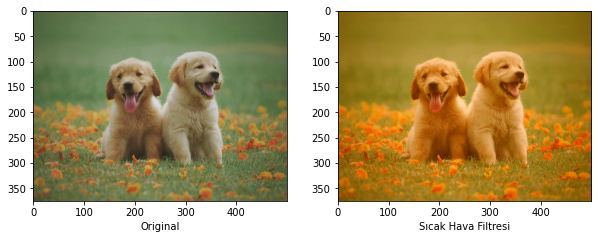

In [ ]:
f3=plt.figure()
f3.set_figheight(10)
f3.set_figwidth(10)
label31=f3.add_subplot(1,2,1)
label31.set_xlabel('Original')
plt.imshow(scaledImage)
label32=f3.add_subplot(1,2,2)
label32.set_xlabel('Sıcak Hava Filtresi')
plt.imshow(warmImage)

**2) Solarize Filtresi**

Solarize filtresi uygulanması için eşik değeri seçilmesi gerekir. Bu eşik değerinden küçük değerlerdeki pikseller maksimum değerden(255) çıkarılarak yeni görüntüye atanır. Eşik değeri 128 seçilmiştir. 

In [ ]:
def SolarizeImage(imageIn):
  imageOut = np.zeros([width, height, 3])

  for i in range(width):
    for j in range(height):
      if imageIn[i][j][0]<128:
         imageOut[i][j][0]=255-imageIn[i][j][0]          
      else: imageOut[i][j][0]=imageIn[i][j][0]  

      if imageIn[i][j][1]<128:
         imageOut[i][j][1]=255-imageIn[i][j][1]          
      else: imageOut[i][j][1]=imageIn[i][j][1]

      if imageIn[i][j][2]<128:
         imageOut[i][j][2]=255-imageIn[i][j][2]          
      else: imageOut[i][j][2]=imageIn[i][j][2]



  imageOut=imageOut/255
  return imageOut


In [ ]:
solarizeImage = np.zeros([width, height, 3])
solarizeImage=SolarizeImage(orgImage)
img.imsave("solarizeImage.png",solarizeImage)

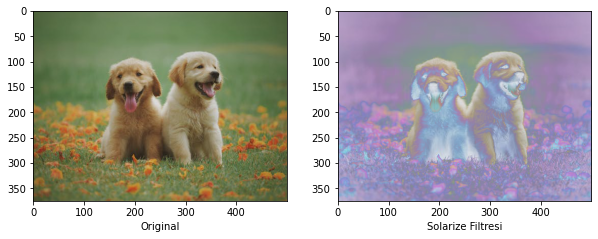

In [ ]:
f4=plt.figure()
f4.set_figheight(10)
f4.set_figwidth(10)
label41=f4.add_subplot(1,2,1)
label41.set_xlabel('Original')
plt.imshow(scaledImage)
label42=f4.add_subplot(1,2,2)
label42.set_xlabel('Solarize Filtresi')
plt.imshow(solarizeImage)

**3) Sephia Filtresi**


---



Sephia filtresi oluşturmak için giriş görüntüsü aşağıdaki denklemlere göre değiştirilerek çıkış görüntüsü elde edilir.

R = (inputR * .393) + (inputG *.769) + (inputB * .189)

G = (inputR * .349) + (inputG *.686) + (inputB * .168)

B = (inputR * .272) + (inputG *.534) + (inputB * .131)

In [ ]:
def SephiaImage(imageIn):
  imageOut = np.zeros([width, height, 3])

  for i in range(width):
    for j in range(height):
      imageOut[i][j][0]= 0.393*imageIn[i][j][0]+0.769*imageIn[i][j][1]+0.189*imageIn[i][j][2] 
      if imageOut[i][j][0]>255: imageOut[i][j][0]=255
      
      imageOut[i][j][1]= 0.349*imageIn[i][j][0]+0.686*imageIn[i][j][1]+0.168*imageIn[i][j][2]
      if imageOut[i][j][1]>255: imageOut[i][j][1]=255

      imageOut[i][j][2]= 0.3272*imageIn[i][j][0]+0.534*imageIn[i][j][1]+0.131*imageIn[i][j][2]
      if imageOut[i][j][2]>255: imageOut[i][j][2]=255

  imageOut=imageOut/255
  return imageOut

In [ ]:
sephiaImage = np.zeros([width, height, 3])
sephiaImage=SephiaImage(orgImage)
img.imsave("sephiaImage.png",sephiaImage)

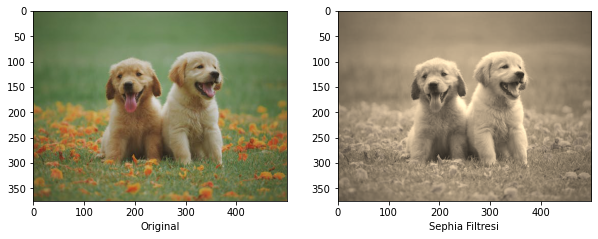

In [ ]:
f5=plt.figure()
f5.set_figheight(10)
f5.set_figwidth(10)
label51=f5.add_subplot(1,2,1)
label51.set_xlabel('Original')
plt.imshow(scaledImage)
label52=f5.add_subplot(1,2,2)
label52.set_xlabel('Sephia Filtresi')
plt.imshow(sephiaImage)

**B) SANATSAL EFEKTLER**

---



**1) Yağlı Boya Efekti**


---


Yağlı boya efekti oluşturulması için radius ve intensity değerleri seçilir. Bu uygulamada 5 ve 20 seçilmiştir.  Radius değerine göre seçilen pikselin etrafındaki pikseller için yoğunluk değerleri incelenir ve en fazla tekrarlanan piksel bulunur. Daha sonra bu değer seçili olan piksele atanır. 

In [ ]:
def OilImage(imageIn,radius,intensitiyLevel):

  greyImage2=(imageIn*intensitiyLevel)
  imageOut = np.zeros([width, height, 3])

  for w in range(width):
    for h in range(height):

      intensityCount=np.zeros((intensitiyLevel+1))
      R=np.zeros((intensitiyLevel+1))
      G=np.zeros((intensitiyLevel+1))
      B=np.zeros((intensitiyLevel+1))

      for i in range(w-radius,w+radius):
        for j in range(h-radius,h+radius):
          if 0< i<width  and  0 <j<height:
            intensity= int(greyImage2[i][j][2]+1)
            intensityCount[intensity]=intensityCount[intensity]+1
            R[intensity]=scaledImage[i,j,0]
            G[intensity]=scaledImage[i,j,1]
            B[intensity]=scaledImage[i,j,2]

      maxIndex=np.argmax(intensityCount)
      maxValue=max(intensityCount)
      
      imageOut[w,h,0]=R[maxIndex]
      imageOut[w,h,1]=G[maxIndex]
      imageOut[w,h,2]=B[maxIndex]

  return imageOut



In [ ]:
oilImage = np.zeros([width, height, 3])
radius=5
intensitiyLevel=20
oilImage=OilImage(greyImage,radius,intensitiyLevel)
img.imsave("oilpaint.png",oilImage)

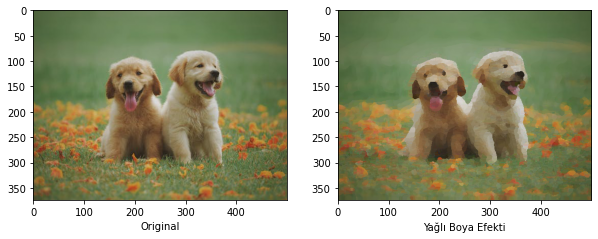

In [ ]:
f6=plt.figure()
f6.set_figheight(10)
f6.set_figwidth(10)
label61=f6.add_subplot(1,2,1)
label61.set_xlabel('Original')
plt.imshow(scaledImage)
label62=f6.add_subplot(1,2,2)
label62.set_xlabel('Yağlı Boya Efekti')
plt.imshow(oilImage)

**2) Döşeme Efekti**


---


Döşeme efekti için 3 farklı değişken kullanılmıştır. Bu değişkenler rastgele değerler alarak tüm piksel değerlerinin çıkış görüntüsüne atanmadan rastegele doldurulmasını sağlamaktadır.

In [ ]:
def TilingImage(imageIn):

  imageOut=np.zeros([width,height,3])
  w=1 
  h=1
  r1=1
  r2=1
  r3=0

  for w in range(width):

    while w+r1<width and h+r2+r3 <height:

      imageOut[r1+w][r2+h:r2+h+r3][:]= imageIn[w][h:h+r3][:]
      r1=int(np.random.rand(1)*5)
      r2=int(np.random.rand(1)*5)
      r3=int(np.random.rand(1)*20)

      h=h+r3
    h=1

  imageOut=imageOut/255
  return imageOut

In [ ]:
tilingImage = np.zeros([width, height, 3])
tilingImage=TilingImage(orgImage)
img.imsave("tilingImage.png",tilingImage)

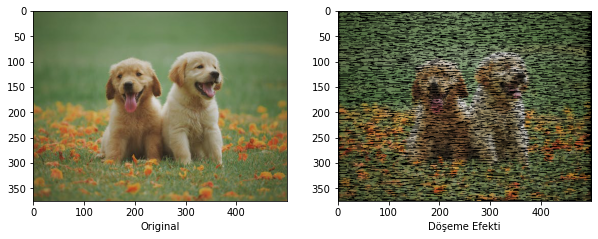

In [ ]:
f7=plt.figure()
f7.set_figheight(10)
f7.set_figwidth(10)
label71=f7.add_subplot(1,2,1)
label71.set_xlabel('Original')
plt.imshow(scaledImage)
label72=f7.add_subplot(1,2,2)
label72.set_xlabel('Döşeme Efekti')
plt.imshow(tilingImage)

**3) Karakalem Efekti**


---

Karakalem efekti oluşturmak için aşağıdaki 4 adım giriş görüntüsüne sırayla uygulanır.

1-Giriş görüntüsü siyah-beyaza çevrilir

2-Siyah-beyaz görüntünün tersi alınır.

3-Görüntü Gauss filtresinden geçirilerek bulanıklaştırılır.

4-Bulanık görüntü ve siyah-beyaz görüntüye **Dodge Blend** metodu uygulanır.



Gauss 7x7 Filtresi oluşturulur.

In [ ]:
def GaussFilter():

  sigma = 20
  s = 2.0 * sigma * sigma
  sum = 0.0
  gauss=np.zeros([7,7])

  for x in range(7):
    for y in range (7):
      r=x^2 + y^2
      gauss[x][y]=np.exp(-(r)/s) /(2*np.pi*s)
      sum=sum+gauss[x][y]
  
  for i in range(7):
    for j in range(7):
      gauss[i][j]= gauss[i][j]/sum
  
  return gauss

In [ ]:
def dodge(front,back):
    # The formula comes from http://www.adobe.com/devnet/pdf/pdfs/blend_modes.pdf
    result=back*256.0/(256.0-front) 
    result[result>255]=255
    result[front==255]=255
    return result.astype('uint8')

Yukarda belirtilen adımlar tek tek uygulanarak istenen efekt elde edilmiştir.

In [ ]:
def SketchImage(imageIn):

  greyIm=GreyScale(imageIn)
  imm=NegativeImage(greyIm)

  imm=imm*255

  gaussFilter=GaussFilter()
  newh=height-7+1
  neww=width-7+1
  gaussimage=np.zeros([width,height,3])

  for d in range (3):
    
    for i in range(neww):
      for j in range(newh):

        for w in range(i,i+7):
          for h in range (j,j+7):
            gaussimage[i][j][d]=gaussimage[i][j][d]+gaussFilter[w-i][h-j]* imm[w][h][d]
  

  sketchIm=dodge(gaussimage,greyIm*255)

  return sketchIm
  

In [ ]:
sketchImage = np.zeros([width, height, 3])
sketchImage=SketchImage(scaledImage)
img.imsave("sketchImage.png",sketchImage/255)

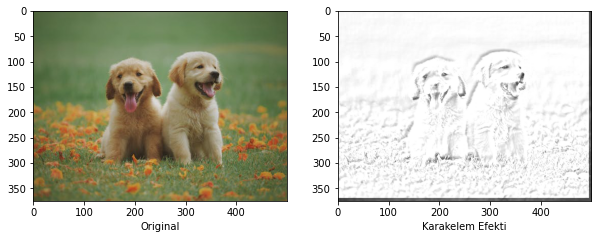

In [ ]:
f8=plt.figure()
f8.set_figheight(10)
f8.set_figwidth(10)
label81=f8.add_subplot(1,2,1)
label81.set_xlabel('Original')
plt.imshow(scaledImage)
label82=f8.add_subplot(1,2,2)
label82.set_xlabel('Karakelem Efekti')
plt.imshow(sketchImage/255)